<a href="https://colab.research.google.com/github/wardla2/Data-Science-Portfolio/blob/main/Project_3/Completed_SQL_1_Chinook_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL - Chinook

## Chinook data set


### SQL in sqlite3

In [ ]:
import sqlite3 as db
import pandas as pd


In [ ]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3


In [ ]:
!sqlite3 --version

3.37.2 2022-01-06 13:25:41 872ba256cbf61d9290b571c0e6d82a20c224ca3ad82971edc46b29818d5dalt1


### Sample database

The [Chinook sample](https://www.sqlitetutorial.net/sqlite-sample-database/)

- Zip file of [sqlite DB](https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip)

- [ER diagram](https://www.sqlitetutorial.net/wp-content/uploads/2018/03/sqlite-sample-database-diagram-color.pdf)

- [ER symbols/meanings](https://d2slcw3kip6qmk.cloudfront.net/marketing/pages/chart/erd-symbols/ERD-Notation.PNG)

- [Draw IO](https://app.diagrams.net/) for creating ER diagrams, flowcharts, etc.

In [ ]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip


Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [ ]:
!rm -f chinook.db


In [ ]:
!unzip -u chinook.zip


Archive:  chinook.zip
  inflating: chinook.db              


In [ ]:
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Oct 23 18:20 .
drwxr-xr-x 1 root root   4096 Oct 23 18:18 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Oct 23 18:19 chinook.zip
drwxr-xr-x 4 root root   4096 Oct 22 13:38 .config
drwxr-xr-x 1 root root   4096 Oct 22 13:39 sample_data


In [ ]:
!pip install ipython-sql
%load_ext sql
%sql sqlite:///chinook.db
import sql


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.0 MB/s eta 0:00:00


### SQL Queries

In [ ]:
# Show the schema for the entire database
%%script sqlite3 --column --header chinook.db

.schema


CREATE TABLE IF NOT EXISTS "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE sqlite_sequence(name,seq);
CREATE TABLE IF NOT EXISTS "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
);
CREATE TABLE IF NOT EXISTS "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON 

In [ ]:
# Get a list of the tables in the database
%%script sqlite3 --column --header chinook.db

.tables


albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [ ]:
# Select the first 10 entries from playlists table
%%script sqlite3 --column --header chinook.db

select *
from playlists
limit 50;


PlaylistId  Name                      
----------  --------------------------
1           Music                     
2           Movies                    
3           TV Shows                  
4           Audiobooks                
5           90’s Music                
6           Audiobooks                
7           Movies                    
8           Music                     
9           Music Videos              
10          TV Shows                  
11          Brazilian Music           
12          Classical                 
13          Classical 101 - Deep Cuts 
14          Classical 101 - Next Steps
15          Classical 101 - The Basics
16          Grunge                    
17          Heavy Metal Classic       
18          On-The-Go 1               


In [ ]:
# Select the first 10 entries from playlist_track table
%%script sqlite3 --column --header chinook.db

select *
from playlist_track
limit 50;


PlaylistId  TrackId
----------  -------
1           3402   
1           3389   
1           3390   
1           3391   
1           3392   
1           3393   
1           3394   
1           3395   
1           3396   
1           3397   
1           3398   
1           3399   
1           3400   
1           3401   
1           3336   
1           3478   
1           3375   
1           3376   
1           3377   
1           3378   
1           3379   
1           3380   
1           3381   
1           3382   
1           3383   
1           3384   
1           3385   
1           3386   
1           3387   
1           3388   
1           3365   
1           3366   
1           3367   
1           3368   
1           3369   
1           3370   
1           3371   
1           3372   
1           3373   
1           3374   
1           99     
1           100    
1           101    
1           102    
1           103    
1           104    
1           105    
1           106    


In [ ]:
# Select the first 10 entries from media_types table
%%script sqlite3 --column --header chinook.db

select *
from media_types;


MediaTypeId  Name                       
-----------  ---------------------------
1            MPEG audio file            
2            Protected AAC audio file   
3            Protected MPEG-4 video file
4            Purchased AAC audio file   
5            AAC audio file             


In [ ]:
# Select the first 10 entries from invoice items table
%%script sqlite3 --column --header chinook.db

select *
from invoice_items
limit 50;


InvoiceLineId  InvoiceId  TrackId  UnitPrice  Quantity
-------------  ---------  -------  ---------  --------
1              1          2        0.99       1       
2              1          4        0.99       1       
3              2          6        0.99       1       
4              2          8        0.99       1       
5              2          10       0.99       1       
6              2          12       0.99       1       
7              3          16       0.99       1       
8              3          20       0.99       1       
9              3          24       0.99       1       
10             3          28       0.99       1       
11             3          32       0.99       1       
12             3          36       0.99       1       
13             4          42       0.99       1       
14             4          48       0.99       1       
15             4          54       0.99       1       
16             4          60       0.99       1       
17        

In [ ]:
# Select the first 10 entries from the employees table
%%script sqlite3 --column --header chinook.db

select *
from employees
limit 10;


EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address                      City        State  Country  PostalCode  Phone              Fax                Email                   
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  ---------------------------  ----------  -----  -------  ----------  -----------------  -----------------  ------------------------
1           Adams     Andrew     General Manager                 1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW          Edmonton    AB     Canada   T5K 2N1     +1 (780) 428-9482  +1 (780) 428-3457  andrew@chinookcorp.com  
2           Edwards   Nancy      Sales Manager        1          1958-12-08 00:00:00  2002-05-01 00:00:00  825 8 Ave SW                 Calgary     AB     Canada   T2P 2T3     +1 (403) 262-3443  +1 (403) 262-3322  nancy@chinookcorp.com   
3           Peacock   Jane       Sales Suppo

In [ ]:
# View employee names and titles
%%script sqlite3 --column --header chinook.db

SELECT FirstName, LastName, Title
FROM employees
LIMIT 10;


FirstName  LastName  Title              
---------  --------  -------------------
Andrew     Adams     General Manager    
Nancy      Edwards   Sales Manager      
Jane       Peacock   Sales Support Agent
Margaret   Park      Sales Support Agent
Steve      Johnson   Sales Support Agent
Michael    Mitchell  IT Manager         
Robert     King      IT Staff           
Laura      Callahan  IT Staff           


In [ ]:
# View employee names and contact
%%script sqlite3 --column --header chinook.db

SELECT FirstName, LastName, Phone, Email
FROM employees
LIMIT 10;


FirstName  LastName  Phone              Email                   
---------  --------  -----------------  ------------------------
Andrew     Adams     +1 (780) 428-9482  andrew@chinookcorp.com  
Nancy      Edwards   +1 (403) 262-3443  nancy@chinookcorp.com   
Jane       Peacock   +1 (403) 262-3443  jane@chinookcorp.com    
Margaret   Park      +1 (403) 263-4423  margaret@chinookcorp.com
Steve      Johnson   1 (780) 836-9987   steve@chinookcorp.com   
Michael    Mitchell  +1 (403) 246-9887  michael@chinookcorp.com 
Robert     King      +1 (403) 456-9986  robert@chinookcorp.com  
Laura      Callahan  +1 (403) 467-3351  laura@chinookcorp.com   


In [ ]:
# View IT staff only
%%script sqlite3 --column --header chinook.db

SELECT FirstName, LastName, Title
FROM employees
WHERE Title = 'IT Staff';


FirstName  LastName  Title   
---------  --------  --------
Robert     King      IT Staff
Laura      Callahan  IT Staff


In [ ]:
## Employees who are either Sales Support Agents OR report to General Manager
%%script sqlite3 --column --header chinook.db

SELECT FirstName, LastName, Title, ReportsTo
FROM employees
WHERE Title = 'Sales Support Agent' OR ReportsTo = 1 ;


FirstName  LastName  Title                ReportsTo
---------  --------  -------------------  ---------
Nancy      Edwards   Sales Manager        1        
Jane       Peacock   Sales Support Agent  2        
Margaret   Park      Sales Support Agent  2        
Steve      Johnson   Sales Support Agent  2        
Michael    Mitchell  IT Manager           1        


In [ ]:
## Employees who are IT Manager and report to General Manager
%%script sqlite3 --column --header chinook.db

SELECT FirstName, LastName, Title, ReportsTo
FROM employees
WHERE Title = 'IT Manager' AND ReportsTo = 1;


FirstName  LastName  Title       ReportsTo
---------  --------  ----------  ---------
Michael    Mitchell  IT Manager  1        


In [ ]:
# Invoices table
%%script sqlite3 --column --header chinook.db

select *
from invoices
limit 10;


InvoiceId  CustomerId  InvoiceDate          BillingAddress           BillingCity  BillingState  BillingCountry  BillingPostalCode  Total
---------  ----------  -------------------  -----------------------  -----------  ------------  --------------  -----------------  -----
1          2           2009-01-01 00:00:00  Theodor-Heuss-Straße 34  Stuttgart                  Germany         70174              1.98 
2          4           2009-01-02 00:00:00  Ullevålsveien 14         Oslo                       Norway          0171               3.96 
3          8           2009-01-03 00:00:00  Grétrystraat 63          Brussels                   Belgium         1000               5.94 
4          14          2009-01-06 00:00:00  8210 111 ST NW           Edmonton     AB            Canada          T6G 2C7            8.91 
5          23          2009-01-11 00:00:00  69 Salem Street          Boston       MA            USA             2113               13.86
6          37          2009-01-19 00:00:0

In [ ]:
## Invoices table filter by total
%%script sqlite3 --column --header chinook.db

SELECT InvoiceId, CustomerId, Total
FROM Invoices
WHERE Total BETWEEN 10 AND 14
LIMIT 10;


InvoiceId  CustomerId  Total
---------  ----------  -----
5          23          13.86
12         2           13.86
19         40          13.86
26         19          13.86
33         57          13.86
40         36          13.86
47         15          13.86
54         53          13.86
61         32          13.86
68         11          13.86


In [ ]:
# Select the first 10 entries from the customers table
%%script sqlite3 --column --header chinook.db

select *
from customers
limit 10;


CustomerId  FirstName  LastName     Company                                           Address                               City                 State  Country         PostalCode  Phone               Fax                 Email                     SupportRepId
----------  ---------  -----------  ------------------------------------------------  ------------------------------------  -------------------  -----  --------------  ----------  ------------------  ------------------  ------------------------  ------------
1           Luís       Gonçalves    Embraer - Empresa Brasileira de Aeronáutica S.A.  Av. Brigadeiro Faria Lima, 2170       São José dos Campos  SP     Brazil          12227-000   +55 (12) 3923-5555  +55 (12) 3923-5566  luisg@embraer.com.br      3           
2           Leonie     Köhler                                                         Theodor-Heuss-Straße 34               Stuttgart                   Germany         70174       +49 0711 2842222                        leo

In [ ]:
## Customers table match email
%%script sqlite3 --column --header chinook.db

SELECT FirstName, LastName, Email
FROM Customers
WHERE Email LIKE '%gmail.com'
LIMIT 10;


FirstName  LastName  Email                      
---------  --------  ---------------------------
François   Tremblay  ftremblay@gmail.com        
Helena     Holý      hholy@gmail.com            
Heather    Leacock   hleacock@gmail.com         
Frank      Ralston   fralston@gmail.com         
Julia      Barnett   jubarnett@gmail.com        
Martha     Silk      marthasilk@gmail.com       
Dominique  Lefebvre  dominiquelefebvre@gmail.com
Phil       Hughes    phil.hughes@gmail.com      


In [ ]:
# Customers table match countries
%%script sqlite3 --column --header chinook.db

SELECT FirstName, LastName, Country
FROM Customers
WHERE Country IN ('USA', 'Canada', 'Brazil')
LIMIT 10;


FirstName  LastName   Country
---------  ---------  -------
Luís       Gonçalves  Brazil 
François   Tremblay   Canada 
Eduardo    Martins    Brazil 
Alexandre  Rocha      Brazil 
Roberto    Almeida    Brazil 
Fernanda   Ramos      Brazil 
Mark       Philips    Canada 
Jennifer   Peterson   Canada 
Frank      Harris     USA    
Jack       Smith      USA    


In [ ]:
## Employees table sorted by hire date
%%script sqlite3 --column --header chinook.db

SELECT FirstName, LastName, Title, HireDate
FROM employees
ORDER BY HireDate
LIMIT 10;


FirstName  LastName  Title                HireDate           
---------  --------  -------------------  -------------------
Jane       Peacock   Sales Support Agent  2002-04-01 00:00:00
Nancy      Edwards   Sales Manager        2002-05-01 00:00:00
Andrew     Adams     General Manager      2002-08-14 00:00:00
Margaret   Park      Sales Support Agent  2003-05-03 00:00:00
Steve      Johnson   Sales Support Agent  2003-10-17 00:00:00
Michael    Mitchell  IT Manager           2003-10-17 00:00:00
Robert     King      IT Staff             2004-01-02 00:00:00
Laura      Callahan  IT Staff             2004-03-04 00:00:00


In [ ]:
## Customers table distinct countries
%%script sqlite3 --column --header chinook.db

SELECT DISTINCT Country
FROM Customers
LIMIT 10;


Country       
--------------
Brazil        
Germany       
Canada        
Norway        
Czech Republic
Austria       
Belgium       
Denmark       
USA           
Portugal      


In [ ]:
## Max from invoice table
%%script sqlite3 --column --header chinook.db

SELECT MAX(Total) AS max_invoice_total
FROM Invoices;


max_invoice_total
-----------------
25.86            


In [ ]:
## Min from invoice table
%%script sqlite3 --column --header chinook.db

SELECT MIN(Total) AS min_invoice_total
FROM Invoices;


min_invoice_total
-----------------
0.99             


In [ ]:
## Total sales by country from invoice table
%%script sqlite3 --column --header chinook.db

SELECT BillingCountry, SUM(Total) AS total_sales
FROM Invoices
GROUP BY BillingCountry
LIMIT 10;


BillingCountry  total_sales
--------------  -----------
Argentina       37.62      
Australia       37.62      
Austria         42.62      
Belgium         37.62      
Brazil          190.1      
Canada          303.96     
Chile           46.62      
Czech Republic  90.24      
Denmark         37.62      
Finland         41.62      


In [ ]:
## Average sales from invoice table
%%script sqlite3 --column --header chinook.db

SELECT AVG(Total) AS average_invoice_total
FROM Invoices;


average_invoice_total
---------------------
5.65194174757282     


In [ ]:
## Customers table customers grouped by country
%%script sqlite3 --column --header chinook.db

SELECT Country, COUNT(*) AS customer_count
FROM Customers
GROUP BY Country
ORDER BY customer_count DESC
LIMIT 10;


Country         customer_count
--------------  --------------
USA             13            
Canada          8             
France          5             
Brazil          5             
Germany         4             
United Kingdom  3             
Portugal        2             
India           2             
Czech Republic  2             
Sweden          1             


In [ ]:
## Customers table with customers >3 by country
%%script sqlite3 --column --header chinook.db

SELECT Country, COUNT(*) AS customer_count
FROM Customers
GROUP BY Country
HAVING customer_count >3;


Country  customer_count
-------  --------------
Brazil   5             
Canada   8             
France   5             
Germany  4             
USA      13            


### Plots

In [ ]:
## From invoices table plot top 10 countries by total sales

# Connect to database
conn = db.connect("chinook.db")

# SQL query
query = """
SELECT BillingCountry, SUM(Total) AS TotalSales
FROM Invoices
GROUP BY BillingCountry
ORDER BY TotalSales DESC
LIMIT 10;
"""

# Load into DataFrame
df_top10 = pd.read_sql_query(query, conn)
conn.close()

df_top10


,BillingCountry,TotalSales
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


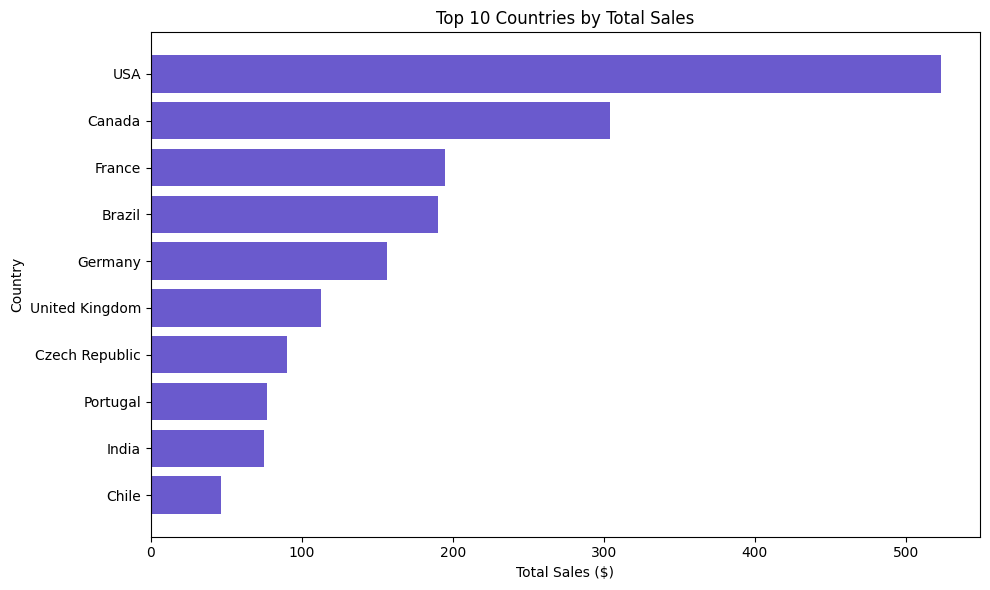

In [ ]:
import matplotlib.pyplot as plt

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(df_top10['BillingCountry'], df_top10['TotalSales'], color='slateblue')
plt.gca().invert_yaxis()

# Labels
plt.xlabel("Total Sales ($)")
plt.ylabel("Country")
plt.title("Top 10 Countries by Total Sales")

plt.tight_layout()
plt.show()


In [ ]:
# From customers table plot top 10 countries by customers

# Connect to the database
conn = db.connect("chinook.db")

# Top 10 countries by customer count
query = """
SELECT Country, COUNT(*) AS CustomerCount
FROM Customers
GROUP BY Country
ORDER BY CustomerCount DESC
LIMIT 10;
"""

# Make DataFrame
top10_customers = pd.read_sql_query(query, conn)
conn.close()

top10_customers


,Country,CustomerCount
0,USA,13
1,Canada,8
2,France,5
3,Brazil,5
4,Germany,4
5,United Kingdom,3
6,Portugal,2
7,India,2
8,Czech Republic,2
9,Sweden,1


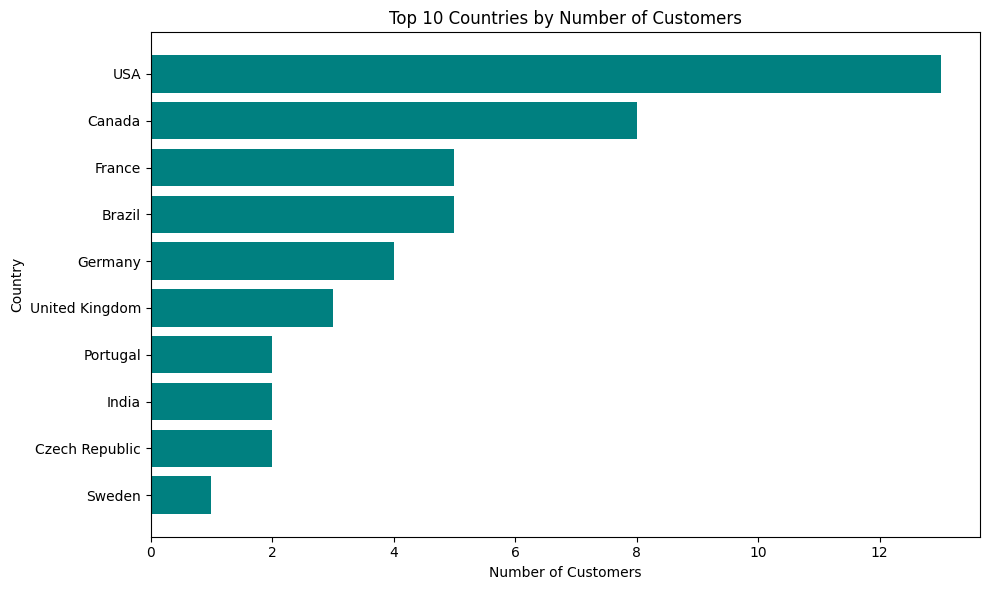

In [ ]:
plt.figure(figsize=(10,6))

# Bar plot
plt.barh(top10_customers['Country'], top10_customers['CustomerCount'], color='teal')
plt.gca().invert_yaxis()

# Labels and title
plt.xlabel("Number of Customers")
plt.ylabel("Country")
plt.title("Top 10 Countries by Number of Customers")

plt.tight_layout()
plt.show()


### Extra credit

In [ ]:
# CTE for total sales by customer
%%script sqlite3 --column --header chinook.db

WITH CustomerSales AS (
    SELECT CustomerId, SUM(Total) AS TotalSpent
    FROM Invoices
    GROUP BY CustomerId
)
SELECT cs.CustomerId, c.FirstName, c.LastName, cs.TotalSpent
FROM CustomerSales cs
JOIN Customers c ON cs.CustomerId = c.CustomerId
ORDER BY cs.TotalSpent DESC
LIMIT 5;


CustomerId  FirstName  LastName    TotalSpent
----------  ---------  ----------  ----------
6           Helena     Holý        49.62     
26          Richard    Cunningham  47.62     
57          Luis       Rojas       46.62     
45          Ladislav   Kovács      45.62     
46          Hugh       O'Reilly    45.62     


In [ ]:
# Join Customers and Invoices tables
%%script sqlite3 --column --header chinook.db

SELECT Customers.CustomerId,
       Customers.FirstName,
       Customers.LastName,
       Invoices.InvoiceId,
       Invoices.Total,
       Invoices.InvoiceDate
FROM Customers
JOIN Invoices
  ON Customers.CustomerId = Invoices.CustomerId
LIMIT 10;


CustomerId  FirstName  LastName   InvoiceId  Total  InvoiceDate        
----------  ---------  ---------  ---------  -----  -------------------
1           Luís       Gonçalves  98         3.98   2010-03-11 00:00:00
1           Luís       Gonçalves  121        3.96   2010-06-13 00:00:00
1           Luís       Gonçalves  143        5.94   2010-09-15 00:00:00
1           Luís       Gonçalves  195        0.99   2011-05-06 00:00:00
1           Luís       Gonçalves  316        1.98   2012-10-27 00:00:00
1           Luís       Gonçalves  327        13.86  2012-12-07 00:00:00
1           Luís       Gonçalves  382        8.91   2013-08-07 00:00:00
2           Leonie     Köhler     1          1.98   2009-01-01 00:00:00
2           Leonie     Köhler     12         13.86  2009-02-11 00:00:00
2           Leonie     Köhler     67         8.91   2009-10-12 00:00:00


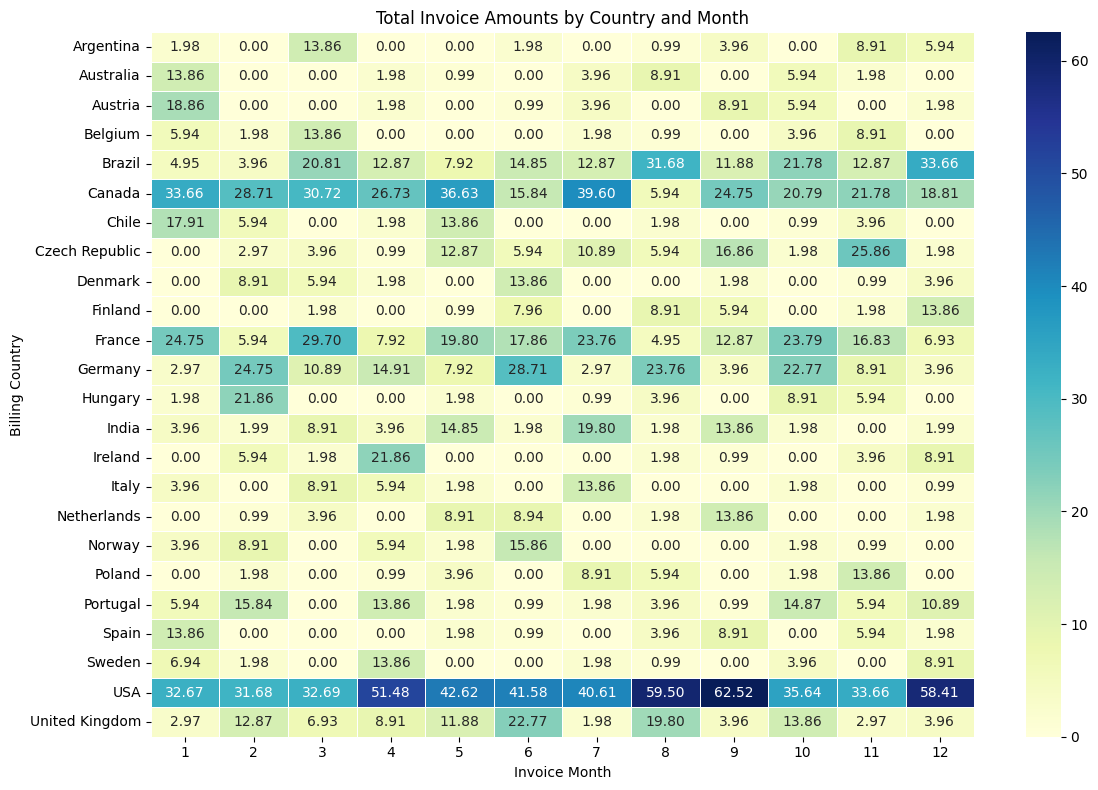

In [ ]:
# Imports

import matplotlib.pyplot as plt
import seaborn as sns

# Connect to Chinook DB and load data
conn = db.connect("chinook.db")

query = """
SELECT
  BillingCountry,
  InvoiceDate,
  Total
FROM Invoices;
"""

df = pd.read_sql_query(query, conn)
conn.close()

# Parse date, extract month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.month

# Group by Country and Month, then pivot
pivot_table = df.groupby(['BillingCountry', 'InvoiceMonth'])['Total'].sum().unstack(fill_value=0)

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Total Invoice Amounts by Country and Month")
plt.xlabel("Invoice Month")
plt.ylabel("Billing Country")
plt.tight_layout()
plt.show()
